# Imports

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

families = {0:"Lamberteschi", 1:"Peruzzi", 2:"Bischeri", 3:"Guadagni", 4:"Castellani",
            5:"Strozzi", 6:"Tornabuoni", 7:"Ridolfi", 8:"Albizzi", 9:"Ginori",
            10:"Barbadori", 11:"Medici", 12:"Acciaiuoli", 13:"Salviati", 14:"Pazzi"}

pos = {0:[6,6], 1:[2,5], 2:[3,5], 3:[5,5], 4:[1,4],
       5:[2,4], 6:[4,4], 7:[3,3], 8:[5,3], 9:[6,3],
       10:[2,2], 11:[4,2], 12:[3,1], 13:[5,1], 14:[6,1]}

# Graph generation

Number of nodes: 15


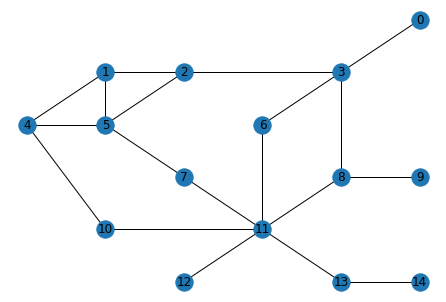

In [2]:
G = nx.Graph()
G.add_nodes_from(families.keys())
# Even if undirected the edges are added in both directions to avoid forgetting one
G.add_edges_from([(0, 3),  # Lamberteschi
                  (1, 4), (1, 5), (1, 2),  # Peruzzi
                  (2, 1), (2, 5), (2, 3),  # Bischeri
                  (3, 0), (3, 2), (3, 6), (3, 8),  # Guadagni
                  (4, 1), (4, 5), (4, 10),  # Castellani
                  (5, 4), (5, 1), (5, 2), (5, 7),  # Strozzi
                  (6, 3), (6, 11),  # Tornabuoni
                  (7, 5), (7, 11),  # Ridolfi
                  (8, 3), (8, 11), (8, 9),  # Albizzi
                  (9, 8),  # Ginori
                  (10, 11), (10, 4),  # Barbadori
                  (11, 6), (11, 8), (11, 13), (11, 12), (11, 10), (11, 7),  # Medici
                  (12, 11),  # Acciaiuoli
                  (13, 11), (13, 14),  # Salviati
                  (14, 13)])  # Pazzi

n_nodes = len(G)
print("Number of nodes:", n_nodes)

nx.draw(G, pos, with_labels=True)

# Avearging Dynamics with Stubborn nodes

In [3]:
n_iter = 20  # Number of iterations
    
# Stubborn and regular nodes
stubborn = [11, 5]
regular = [node for node in G.nodes if node not in stubborn]

u = [1, -1]  # Stubborn nodes input
ic = np.zeros(len(regular))  # Regular nodes initial condition

# P matrix
W = nx.adjacency_matrix(G).toarray() # scipy.sparse.csr_matrix to numpy array
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Submatrices Q and E
Q = P[np.ix_(regular, regular)]
E = P[np.ix_(regular, stubborn)]

# Initial condition for the dynamics
x = np.zeros((n_nodes,n_iter))
x[stubborn, 0] = u;
x[regular, 0] = ic;
print("Initial condition:", x[:,0], '\n')

# Evolve the opinion vector
for t in range(1,n_iter):
    x[regular, t] = Q @ x[regular, t-1] + E @ x[stubborn, t-1]
    x[stubborn, t] = x[stubborn, t-1];

print("Nodes value:")
x_final = x[:,n_iter-1]
for node in G.nodes:
    print(families[node], ": ", round(x_final[node], 2))

Initial condition: [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  1.  0.  0.  0.] 

Nodes value:
Lamberteschi :  0.27
Peruzzi :  -0.64
Bischeri :  -0.46
Guadagni :  0.27
Castellani :  -0.46
Strozzi :  -1.0
Tornabuoni :  0.63
Ridolfi :  0.0
Albizzi :  0.63
Ginori :  0.63
Barbadori :  0.27
Medici :  1.0
Acciaiuoli :  1.0
Salviati :  1.0
Pazzi :  1.0


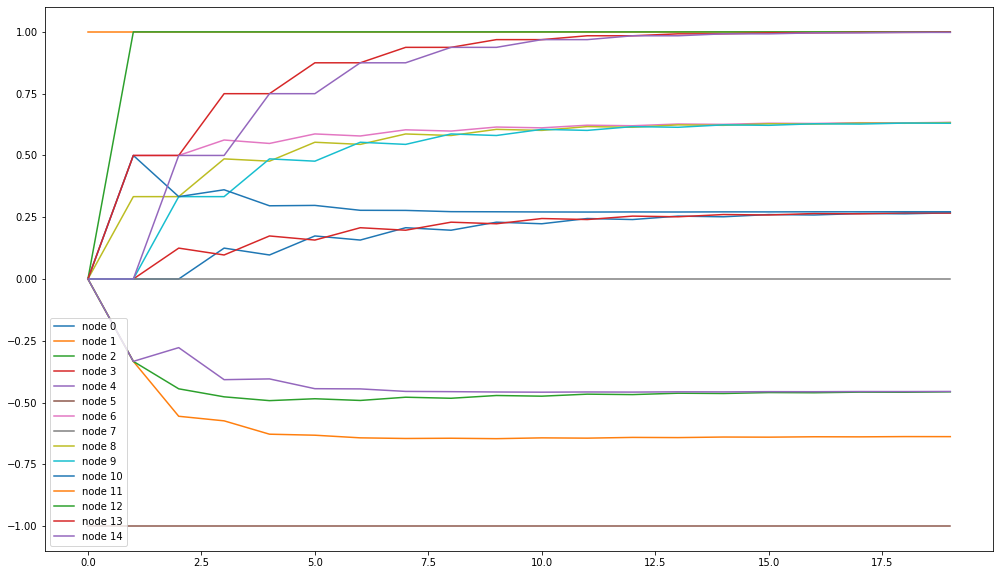

In [ ]:
fig = plt.figure(1, figsize=(17,10))
ax = plt.subplot(111)

for node in range(n_nodes):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()